In [49]:
from sklearn import tree
from typing import Dict, Tuple, Set, List
from tqdm import tqdm
import matplotlib.pyplot as plt
from random import randint
from collections import Counter

In [3]:
class Dataset(object):
    def __init__(self, clazzes_num, features_num, X, Y):
        self.clazzes_num = clazzes_num
        self.features_num = features_num
        self.X = X
        self.Y = Y

def read_file(filename: str):
    X: List[List[int]] = []
    Y: List[int] = []
    file = open(filename, "r")
    features_num, clazzes_num = [int(x) for x in file.readline().split()]
    num_objects = int(file.readline())
    for i in range(num_objects):
        features = [int(x) for x in file.readline().split()]
        clazz = features.pop()
        X.append(features)
        Y.append(clazz)
    return Dataset(clazzes_num, features_num, X, Y)

In [6]:
FILES_NUM = 21
FOLDER = "DT_txt"
FILE_TRAIN_SUFFIX = "_train.txt"
FILE_TEST_SUFFIX = "_test.txt"

In [7]:
train_datasets: List[Dataset] = []
test_datasets: List[Dataset] = []
for i in range(1, FILES_NUM + 1):
    file_index = f'0{i}' if i < 10 else f'{i}'
    train_file = FOLDER + "/" + file_index + FILE_TRAIN_SUFFIX
    test_file = FOLDER + "/" + file_index + FILE_TEST_SUFFIX
    train_datasets.append(read_file(train_file))
    test_datasets.append(read_file(test_file))

print(len(train_datasets))
print(len(test_datasets))

21
21


In [11]:
heights = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
criterions = ["gini", "entropy"]
splitters = ["best", "random"]

In [17]:
def count_for_datasets(train_dataset: Dataset, test_dataset: Dataset):
    best_accuracy = 0
    best_height = -1
    best_criterion = ""
    best_splitter = ""
    for height in heights:
        for criterion in criterions:
            for splitter in splitters:
                clf = tree.DecisionTreeClassifier(criterion=criterion,splitter=splitter,max_depth=height)
                clf.fit(train_dataset.X, train_dataset.Y)
                accuracy = 0
                for i in range(len(test_dataset.X)):
                    pred = clf.predict([test_dataset.X[i]])
                    if pred == test_dataset.Y[i]:
                        accuracy += 1
                accuracy /= len(test_dataset.Y)
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_height = height
                    best_criterion = criterion
                    best_splitter = splitter
    return best_height, best_criterion, best_splitter, best_accuracy

In [20]:
for i in range(FILES_NUM):
    best_height, best_criterion, best_splitter, best_accuracy = count_for_datasets(train_datasets[i], test_datasets[i])
    print(f'Dataset #{i + 1}: accuracy={best_accuracy}, height={best_height}, criterion={best_criterion}, splitter={best_splitter}')

Dataset #1: accuracy=0.9997429966589566, height=3, criterion=entropy, splitter=best
Dataset #2: accuracy=0.7030534351145038, height=9, criterion=entropy, splitter=best
Dataset #3: accuracy=1.0, height=1, criterion=gini, splitter=best
Dataset #4: accuracy=0.9951304347826087, height=5, criterion=entropy, splitter=best
Dataset #5: accuracy=0.9956709956709957, height=1, criterion=gini, splitter=best
Dataset #6: accuracy=0.9988962472406181, height=3, criterion=entropy, splitter=best
Dataset #7: accuracy=0.9967441860465116, height=3, criterion=entropy, splitter=best
Dataset #8: accuracy=0.997920997920998, height=2, criterion=gini, splitter=best
Dataset #9: accuracy=0.8529411764705882, height=5, criterion=entropy, splitter=best
Dataset #10: accuracy=0.9979879275653923, height=4, criterion=entropy, splitter=best
Dataset #11: accuracy=0.999195171026157, height=1, criterion=gini, splitter=best
Dataset #12: accuracy=0.876789222565254, height=8, criterion=entropy, splitter=best
Dataset #13: accura

In [23]:
# max height=11 for dataset #21 
# min height=1 for dataset #3
min_num = "03"
min_index = 2
min_height = 1
criterion_for_min = "gini"
splitter_for_min = "best"

max_num = "21"
max_index = 20
max_height = 11
criterion_for_max = "entropy"
splitter_for_max = "best"

In [36]:
# min
train_accuracies_min = []
test_accuracies_min = []
for height in heights:
    clf = tree.DecisionTreeClassifier(criterion=criterion_for_min,splitter=splitter_for_min,max_depth=height)
    clf.fit(train_datasets[min_index].X, train_datasets[min_index].Y)
    ####### train accuracy
    train_accuracy = 0
    for i in range(len(train_datasets[min_index].X)):
        pred = clf.predict([train_datasets[min_index].X[i]])
        if pred == train_datasets[min_index].Y[i]:
            train_accuracy += 1
    train_accuracy /= len(train_datasets[min_index].Y)
    train_accuracies_min.append(train_accuracy)
    ######################
    ####### test accuracy
    test_accuracy = 0
    for i in range(len(test_datasets[min_index].X)):
        pred = clf.predict([test_datasets[min_index].X[i]])
        if pred == test_datasets[min_index].Y[i]:
            test_accuracy += 1
    test_accuracy /= len(test_datasets[min_index].Y)
    test_accuracies_min.append(test_accuracy)

In [37]:
# max
train_accuracies_max = []
test_accuracies_max = []
for height in heights:
    clf = tree.DecisionTreeClassifier(criterion=criterion_for_max,splitter=splitter_for_max,max_depth=height)
    clf.fit(train_datasets[max_index].X, train_datasets[max_index].Y)
    ####### train accuracy
    train_accuracy = 0
    for i in range(len(train_datasets[max_index].X)):
        pred = clf.predict([train_datasets[max_index].X[i]])
        if pred == train_datasets[max_index].Y[i]:
            train_accuracy += 1
    train_accuracy /= len(train_datasets[max_index].Y)
    train_accuracies_max.append(train_accuracy)
    ######################
    ####### test accuracy
    test_accuracy = 0
    for i in range(len(test_datasets[max_index].X)):
        pred = clf.predict([test_datasets[max_index].X[i]])
        if pred == test_datasets[max_index].Y[i]:
            test_accuracy += 1
    test_accuracy /= len(test_datasets[max_index].Y)
    test_accuracies_max.append(test_accuracy)

In [38]:
def show_plot_heights_accuracies(x, y, title):
    plt.title(title)
    plt.plot(x, y)
    plt.ylabel('Accuracy')
    plt.xlabel('Height')
    plt.show()

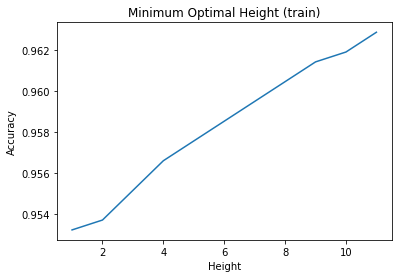

In [43]:
show_plot_heights_accuracies(heights, train_accuracies_min, "Minimum Optimal Height (train)")

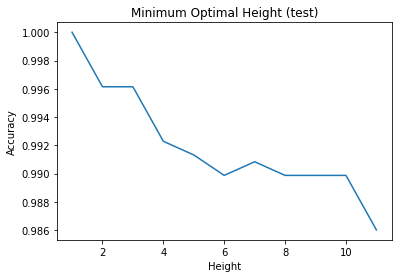

In [44]:
show_plot_heights_accuracies(heights, test_accuracies_min, "Minimum Optimal Height (test)")

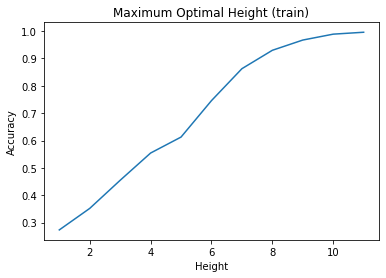

In [45]:
show_plot_heights_accuracies(heights, train_accuracies_max, "Maximum Optimal Height (train)")

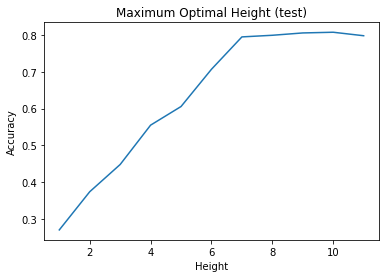

In [46]:
show_plot_heights_accuracies(heights, test_accuracies_max, "Maximum Optimal Height (test)")

In [73]:
def generate_random_sample(dataset: Dataset):
    size = len(dataset.X)
    random_X: List[List[int]] = []
    random_Y: List[int] = []
    for i in range(size):
        index = randint(0, size - 1)
        random_X.append(dataset.X[i])
        random_Y.append(dataset.Y[i])
    return random_X, random_Y
    

In [92]:
# random forest
def random_forest_for_dataset(train_dataset, trees_num=101):
    trees = []
    for i in range(trees_num):
        clf = tree.DecisionTreeClassifier()
        X, y = generate_random_sample(train_dataset)
        clf.fit(X, y)
        trees.append(clf)
    return trees

def forest_predict(trees, x):
    predictions = []
    for tree in trees:
        predictions.append(tree.predict([x])[0])
    res, _unused = Counter(predictions).most_common(1)[0]
#     print(predictions)
    return res

    

In [95]:
def handle_dataset_forest(train_dataset: Dataset, test_dataset: Dataset):
    forest = random_forest_for_dataset(train_dataset)
    train_accuracy = 0
    test_accuracy = 0
    
    for i in range(len(train_dataset.X)):
        pred = forest_predict(forest, train_dataset.X[i])
        if pred == train_dataset.Y[i]:
            train_accuracy += 1
    train_accuracy /= len(train_dataset.X)

    for i in range(len(test_dataset.X)):
        pred = forest_predict(forest, test_dataset.X[i]) 
        if pred == test_dataset.Y[i]:
            test_accuracy += 1
    test_accuracy /= len(test_dataset.X)
    return train_accuracy, test_accuracy

In [96]:
for i in range(FILES_NUM):
    train_accuracy, test_accuracy = handle_dataset_forest(train_datasets[i], test_datasets[i])
    print(f'Dataset #{i + 1}: train accuracy={train_accuracy}, test accuracy={test_accuracy}')

Dataset #1: train accuracy=1.0, test accuracy=0.9393472115137497
Dataset #2: train accuracy=1.0, test accuracy=0.6391857506361324
Dataset #3: train accuracy=1.0, test accuracy=0.9652844744455159
Dataset #4: train accuracy=1.0, test accuracy=0.9725217391304348
Dataset #5: train accuracy=1.0, test accuracy=0.9653679653679653
Dataset #6: train accuracy=1.0, test accuracy=0.9552980132450332
Dataset #7: train accuracy=1.0, test accuracy=0.9586046511627907
Dataset #8: train accuracy=1.0, test accuracy=0.9958419958419958
Dataset #9: train accuracy=1.0, test accuracy=0.803921568627451
Dataset #10: train accuracy=1.0, test accuracy=0.9444668008048289
Dataset #11: train accuracy=1.0, test accuracy=0.9517102615694165
Dataset #12: train accuracy=1.0, test accuracy=0.8554588829637946
Dataset #13: train accuracy=1.0, test accuracy=0.6165137614678899
Dataset #14: train accuracy=1.0, test accuracy=0.9382477807796218
Dataset #15: train accuracy=1.0, test accuracy=0.9615615615615616
Dataset #16: train a